# 1 - Perceptron

In [135]:
# Mlxtend (machine learning extensions)
#!pip install mlxtend

In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
from time import time
%matplotlib inline

In [137]:
# Dataset
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header = None)
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [138]:
# Obtendo dados de duas classes: Setosa e versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)
X = df.iloc[0:100, [0,2]].values

In [139]:
# Algoritmo Perceptron
class Perceptron(object):

    def __init__(self, lr = 0.01, epochs = 50):
        # lr = taxa de aprendizagem (learning rate) - valores entre 0 e 1
        self.lr = lr
        # epoch = número de passos no dataset de treino
        self.epochs = epochs

    def train(self, X, y):
        
        # Aqui é criado uma lista de valores zero, onde self.w_[0] = bias, self.w_[1:] = pesos
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.epochs):
            # erros da epoca atual
            errors = 0
            for xi, target in zip(X, y):
                # cálculo do erro -> target - self.predict(xi)
                # Cálcula o erro e aplica o lr(taxa de aprendizagem)
                update = self.lr * (target - self.predict(xi))
                # atualiza os pesos
                self.w_[1:] +=  update * xi
                # atualiza o bias
                self.w_[0] +=  update
                errors += int(update != 0.0)
            # atualiza erros da época
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        # Combinador linear
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        # função de ativação
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [140]:
# Criando o modelo
clf_perceptron = Perceptron(epochs = 10, lr = 0.1)

In [141]:
# Treinamento
clf_perceptron.train(X, y)

In [142]:
# Pesos aprendidos pelo modelo
clf_perceptron.w_

array([-0.4 , -0.68,  1.82])

Pesos (Weights): [-0.4  -0.68  1.82]


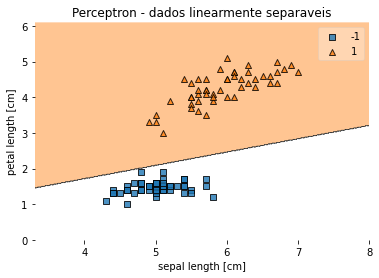

In [143]:
print('Pesos (Weights): %s' % clf_perceptron.w_)
plot_decision_regions(X, y, clf = clf_perceptron)
plt.title('Perceptron - dados linearmente separaveis')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.show()

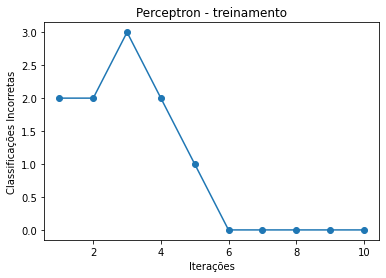

In [144]:

plt.plot(range(1, len(clf_perceptron.errors_)+1), clf_perceptron.errors_, marker = 'o')
plt.title('Perceptron - treinamento')
plt.xlabel('Iterações')
plt.ylabel('Classificações Incorretas')
plt.show()

## 1.1 - Problemas com o Perceptron

### Embora o perceptron tenha classificado perfeitamente as duas classes de flores do dataset Iris, a convergência é um dos maiores problemas do perceptron. Frank Rosenblatt comprovou matematicamente que a regra de aprendizado do perceptron converge se as duas classes podem ser separadas por um hiperplano linear, mas surgem problemas se as classes não podem ser perfeitamente separadas por um hiperplano linear.

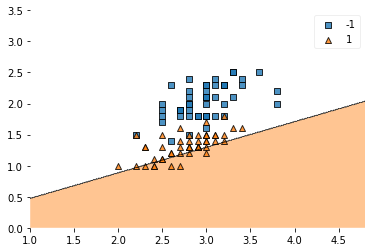

In [145]:
# Versicolor e virginica
y2 = df.iloc[50:150, 4].values
y2 = np.where(y2 == 'Iris-virginica', -1, 1)
X2 = df.iloc[50:150, [1,3]].values

clf = Perceptron(epochs = 25, lr = 0.01)
clf.train(X2, y2)

plot_decision_regions(X2, y2, clf = clf)
plt.show()

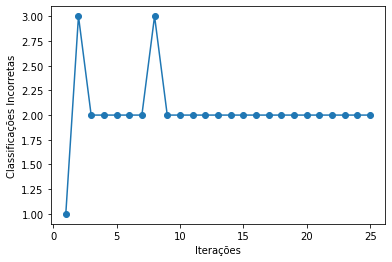

In [146]:
plt.plot(range(1, len(clf.errors_)+1), clf.errors_, marker = 'o')
plt.xlabel('Iterações')
plt.ylabel('Classificações Incorretas')
plt.show()

In [147]:
print('Número Total de Classificações Incorretas: %d of 100' % (y2 != clf.predict(X2)).sum())

Número Total de Classificações Incorretas: 43 of 100


# 2 - Adaline e Regra Delta 

### O perceptron certamente era muito popular no momento de sua descoberta, no entanto, levou apenas alguns anos até que Bernard Widrow e seu aluno de doutorado Tedd Hoff propuseram a ideia do Adaline (Adaptive Linear Neuron). Em contraste com a regra perceptron, a regra delta do Adaline atualiza os pesos com base em uma função de ativação linear em vez de uma função de etapa unitária.

In [148]:
# Adaline com Gradiebte Descendente
class AdalineGD(object):

    def __init__(self, lr = 0.01, epochs = 50):
        self.lr = lr
        self.epochs = epochs

    def train(self, X, y):

        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for i in range(self.epochs):
            output = self.net_input(X)
            # cálculo do erro
            errors = (y - output)
            # atualiza pesos
            self.w_[1:] += self.lr * X.T.dot(errors)
            # atualiza bias
            self.w_[0] += self.lr * errors.sum()
            # mean squared error (MSE)
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        return self.net_input(X)

    def predict(self, X):
        return np.where(self.activation(X) >= 0.0, 1, -1)

### Perceba que no treinamento acima é cálculado e atualizado os parâmetros para todos os dados em uma unica etápa

In [149]:
# Padronizando os atributos
X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()

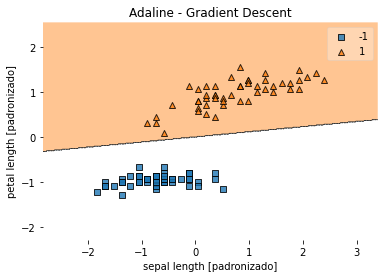

In [150]:
ada = AdalineGD(epochs = 15, lr = 0.01)

ada.train(X_std, y)
plot_decision_regions(X_std, y, clf=ada)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [padronizado]')
plt.ylabel('petal length [padronizado]')
plt.show()

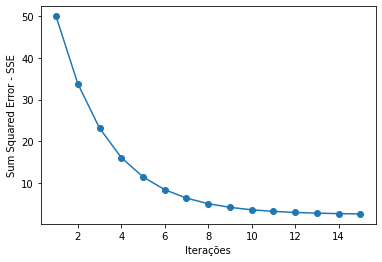

In [151]:
plt.plot(range(1, len( ada.cost_)+1), ada.cost_, marker = 'o')
plt.xlabel('Iterações')
plt.ylabel('Sum Squared Error - SSE')
plt.show()

# 3 - Learn rate - cuidados com valores 

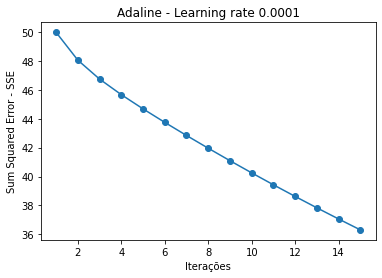

In [152]:
ada_2 = AdalineGD(epochs=15, lr=0.0001).train(X, y)
plt.plot(range(1, len(ada_2.cost_)+1), ada_2.cost_, marker='o')
plt.xlabel('Iterações')
plt.ylabel('Sum Squared Error - SSE')
plt.title('Adaline - Learning rate 0.0001')
plt.show()

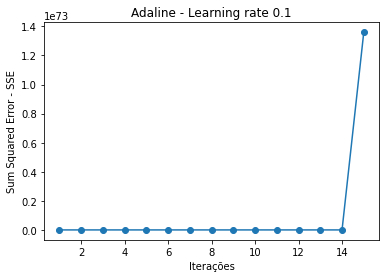

In [153]:
ada_3 = AdalineGD(epochs=15, lr=0.1).train(X, y)
plt.plot(range(1, len(ada_3.cost_)+1), ada_3.cost_, marker='o')
plt.xlabel('Iterações')
plt.ylabel('Sum Squared Error - SSE')
plt.title('Adaline - Learning rate 0.1')
plt.show()

### O plot acima enfatiza bem a importância de traçar curvas de aprendizagem ilustrando dois problemas mais comuns com gradiente descendente:
### 1- Se a taxa de aprendizado for muito grande, o gradiente descendente superará os mínimos e divergirá.
### 2- Se a taxa de aprendizagem for muito pequena, o algoritmo exigirá muitas épocas (passagens) para convergir e pode ficar preso nos locais mínimos com mais facilidade.

# 4 - Online Learning com Stochastic Gradient Descent

### A seção anterior foi sobre a aprendizagem baseada no gradiente descendente em "lote" (batch). As atualizações "em lote" referem-se ao fato de que a função de custo é minimizada com base no conjunto completo de dados de treinamento. Se pensarmos na regra do perceptron, lembramos que ela realizou a atualização de peso de forma incremental após cada amostra de treinamento individual. Essa abordagem também é chamada de aprendizagem "online", e de fato, é assim que Adaline foi descrita pela primeira vez por Bernard Widrow.

### O processo de atualização incremental dos pesos é também chamado de Stochastic Gradient Descent, uma vez que aproxima a minimização da função de custo.  Muitas vezes, a descida de gradiente estocástica converge muito mais rápido do que a descida de gradiente, uma vez que as atualizações são aplicadas imediatamente após cada amostra de treinamento. A descida de gradiente estocástica é computacionalmente mais eficiente, especialmente para conjuntos de dados muito grandes. Outra vantagem do aprendizado on-line é que o classificador pode ser atualizado imediatamente à medida que novos dados de treinamento chegam, por exemplo, como em aplicativos da Web, e dados de treinamento antigos podem ser descartados se o armazenamento for um problema. Em sistemas de aprendizagem de máquina de grande escala, também é prática comum usar os chamados "mini-lotes" (mini-batches), um compromisso com uma convergência mais suave do que a descida de gradiente estocástica.

In [154]:
# Algoritmo Adaline com Gradient Descent
class AdalineSGD(object):

    def __init__(self, eta = 0.01, epochs = 50):
        self.eta = eta
        self.epochs = epochs

    def train(self, X, y, reinitialize_weights = True):

        if reinitialize_weights:
            self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for i in range(self.epochs):
            for xi, target in zip(X, y):
                output = self.net_input(xi)
                error = (target - output)
                self.w_[1:] += self.eta * xi.dot(error)
                self.w_[0] += self.eta * error

            cost = ((y - self.activation(X))**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        return self.net_input(X)

    def predict(self, X):
        return np.where(self.activation(X) >= 0.0, 1, -1)

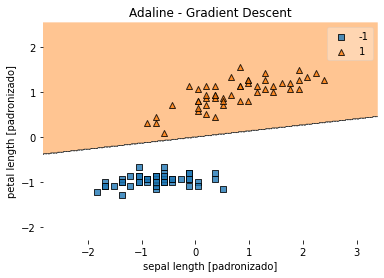

In [155]:
ada = AdalineSGD(epochs = 15, eta = 0.01)

np.random.seed(123)
idx = np.random.permutation(len(y))
X_shuffled, y_shuffled =  X_std[idx], y[idx]

ada.train(X_shuffled, y_shuffled)
plot_decision_regions(X_shuffled, y_shuffled, clf=ada)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [padronizado]')
plt.ylabel('petal length [padronizado]')
plt.show()

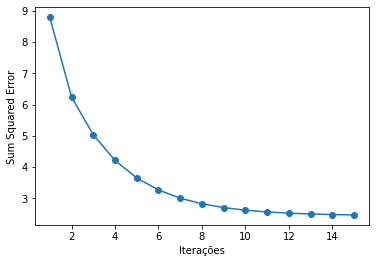

In [156]:
plt.plot(range(1, len(ada.cost_)+1), ada.cost_, marker = 'o')
plt.xlabel('Iterações')
plt.ylabel('Sum Squared Error')
plt.show()

### Fim